<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd

url = 'https://raw.githubusercontent.com/amankharwal/Website-data/refs/heads/master/weatherAUS.csv' #load dataset :)
df = pd.read_csv(url)

In [83]:
df.shape #142193 rows, 24 columns

(142193, 24)

In [84]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [85]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [87]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [88]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0,0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,0


In [89]:
dir_to_deg = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

df['WindDir9am'] = df['WindDir9am'].map(dir_to_deg)
df['WindDir3pm'] = df['WindDir3pm'].map(dir_to_deg)
df['WindGustDir'] = df['WindGustDir'].map(dir_to_deg)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  float64
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  float64
 10  WindDir3pm     138415 non-null  float64
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [91]:
df['Date'] = pd.to_datetime(df['Date'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  float64       
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  float64       
 10  WindDir3pm     138415 non-null  float64       
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

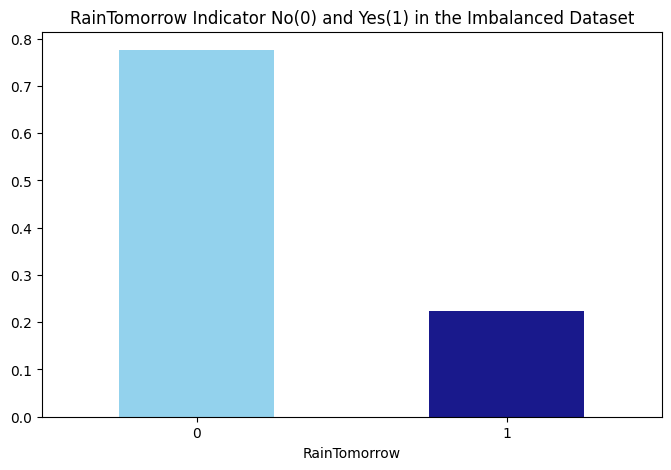

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

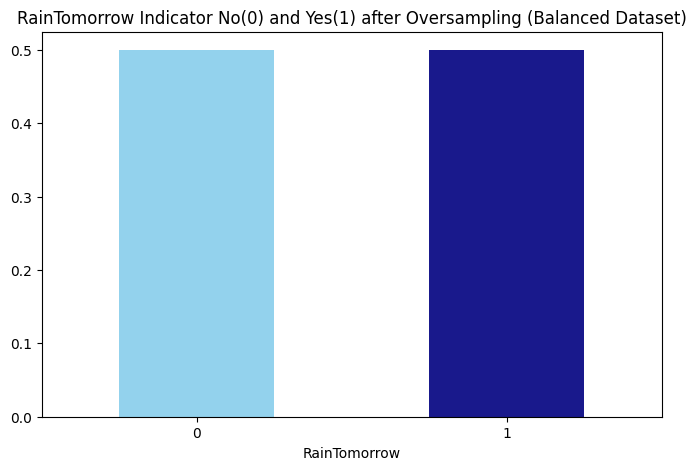

In [94]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

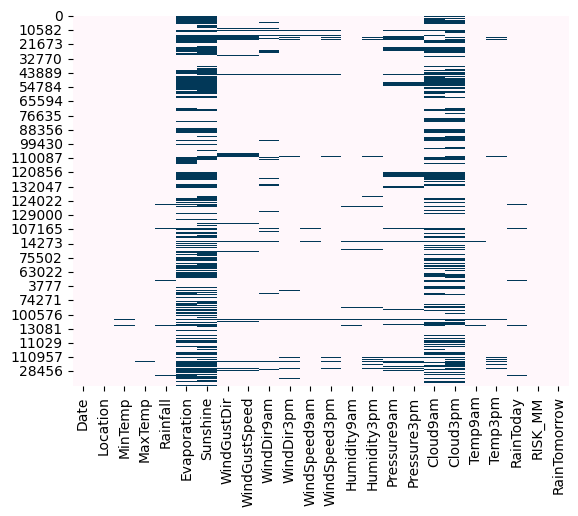

In [95]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [96]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [97]:
df[["Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"]].dtypes

,0
Sunshine,float64
Evaporation,float64
Cloud3pm,float64
Cloud9am,float64


In [98]:
for col in ["Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"]:
    unique_vals = df[col].dropna().unique()
    print(f"{col} — {len(unique_vals)} unique values")
    print(f"Sample: {sorted(unique_vals)[:10]}")
    print()

#Sunshine, Evaporation are Continous, Cloud3pm and Cloud9am are Categorical

Sunshine — 145 unique values
Sample: [np.float64(0.0), np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]

Evaporation — 356 unique values
Sample: [np.float64(0.0), np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]

Cloud3pm — 10 unique values
Sample: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]

Cloud9am — 10 unique values
Sample: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]



In [99]:
df["Cloud3pm"].value_counts() #apparently 9.0 is outlier

,count
Cloud3pm,
7.0,34124
8.0,29306
1.0,16895
6.0,14276
5.0,10091
3.0,9029
2.0,8669
4.0,7588
0.0,5039


In [100]:
# Median Imputer for continuous features
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df[["Sunshine", "Evaporation"]] = median_imputer.fit_transform(df[["Sunshine", "Evaporation"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["Cloud3pm", "Cloud9am"]] = mode_imputer.fit_transform(df[["Cloud3pm", "Cloud9am"]])

In [101]:
numeric_cols = df.select_dtypes(include=['float64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5 * IQR for all numeric columns
df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

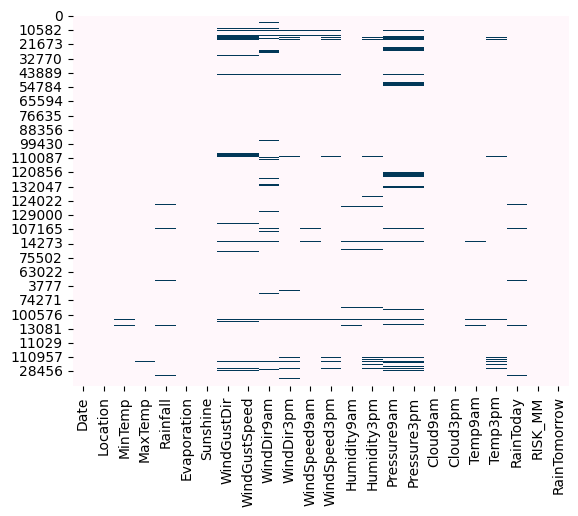

In [102]:
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [103]:
df.shape

(220632, 24)

In [104]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,220632,219550.000000,220161.000000,217508.000000,220632.000000,220632.000000,205141.000000,205278.000000,205904.000000,214192.00000,...,214601.000000,198904.000000,198886.00000,220632.000000,220632.000000,218979.000000,216074.000000,217508.000000,220632.000000,220632.000000
mean,2013-03-25 10:45:09.104753408,12.522257,22.454739,3.674979,4.815321,6.640840,173.906252,42.048602,166.145995,174.97061,...,57.618585,1016.494868,1014.20766,5.766911,5.894004,16.858659,20.789089,0.309676,5.172102,0.500000
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,...,0.000000,980.500000,977.10000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,2010-12-28 00:00:00,7.900000,17.200000,0.000000,4.000000,6.500000,90.000000,31.000000,67.500000,90.00000,...,42.000000,1011.700000,1009.30000,5.000000,5.000000,12.100000,15.700000,0.000000,0.000000,0.000000
50%,2013-05-13 00:00:00,12.200000,21.800000,0.000000,4.400000,6.800000,180.000000,41.000000,157.500000,180.00000,...,58.000000,1016.500000,1014.20000,7.000000,7.000000,16.500000,20.100000,0.000000,1.050000,0.500000
75%,2015-06-09 00:00:00,17.200000,27.400000,2.200000,5.000000,7.200000,270.000000,50.000000,270.000000,270.00000,...,73.000000,1021.400000,1019.10000,7.000000,7.000000,21.400000,25.500000,1.000000,5.200000,1.000000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,337.500000,135.000000,337.500000,337.50000,...,100.000000,1041.000000,1039.60000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000
std,NaN,6.389343,7.112835,11.131122,3.019808,2.856932,102.803486,14.628039,108.209092,102.93390,...,21.825840,7.351730,7.29113,2.400679,2.231527,6.450944,6.938701,0.462361,12.101490,0.500001


In [105]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,3124
Evaporation,0
Sunshine,0
WindGustDir,15491
WindGustSpeed,15354
WindDir9am,14728


In [106]:
category_distribution = df['WindDir9am'].value_counts(dropna=False, normalize=True) * 100
print(category_distribution)

WindDir9am
0.0      9.116085
NaN      6.675369
315.0    6.528065
337.5    6.288299
270.0    6.169549
22.5     5.875394
225.0    5.872222
135.0    5.850919
157.5    5.844121
180.0    5.744860
90.0     5.578067
292.5    5.389971
202.5    5.230429
45.0     5.172867
67.5     5.035534
247.5    4.960296
112.5    4.667954
Name: proportion, dtype: float64


In [107]:
# Median Imputer for continuous features
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df[["Pressure9am", "Pressure3pm"]] = median_imputer.fit_transform(df[["Pressure9am", "Pressure3pm"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["WindGustDir", "WindDir9am", "WindDir3pm"]] = mode_imputer.fit_transform(df[["WindGustDir", "WindDir9am", "WindDir3pm"]])

In [108]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,3124
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,15354
WindDir9am,0


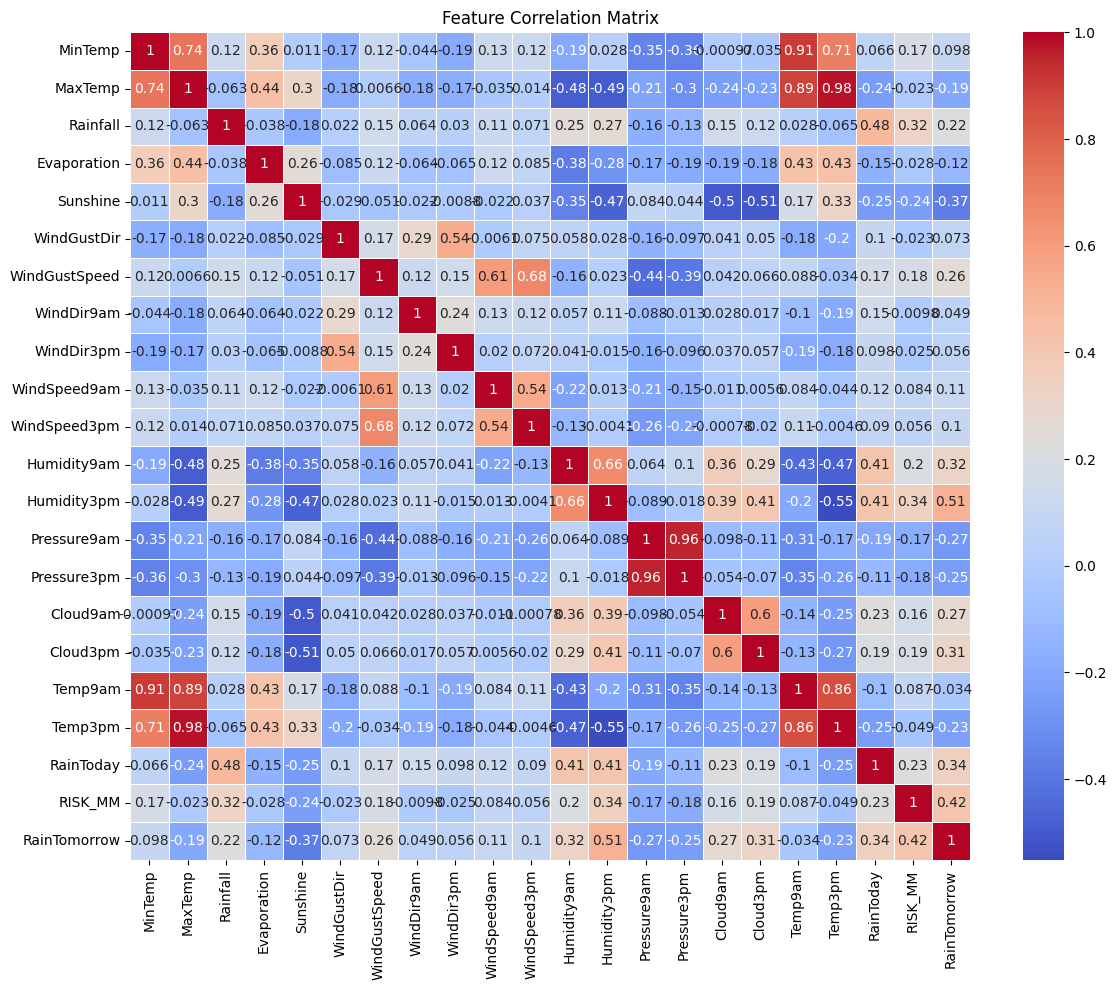

In [109]:
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [114]:
# Median Imputer for continuous features
median_imputer = SimpleImputer(strategy='median')
df[["RISK_MM", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "WindGustSpeed"]] = median_imputer.fit_transform(df[["RISK_MM", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "WindGustSpeed"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["RainToday"]] = mode_imputer.fit_transform(df[["RainToday"]])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 26599
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           220632 non-null  datetime64[ns]
 1   Location       220632 non-null  object        
 2   MinTemp        219550 non-null  float64       
 3   MaxTemp        220161 non-null  float64       
 4   Rainfall       220632 non-null  float64       
 5   Evaporation    220632 non-null  float64       
 6   Sunshine       220632 non-null  float64       
 7   WindGustDir    220632 non-null  float64       
 8   WindGustSpeed  220632 non-null  float64       
 9   WindDir9am     220632 non-null  float64       
 10  WindDir3pm     220632 non-null  float64       
 11  WindSpeed9am   218426 non-null  float64       
 12  WindSpeed3pm   216279 non-null  float64       
 13  Humidity9am    220632 non-null  float64       
 14  Humidity3pm    220632 non-null  float64       
 15  Pressu

In [116]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


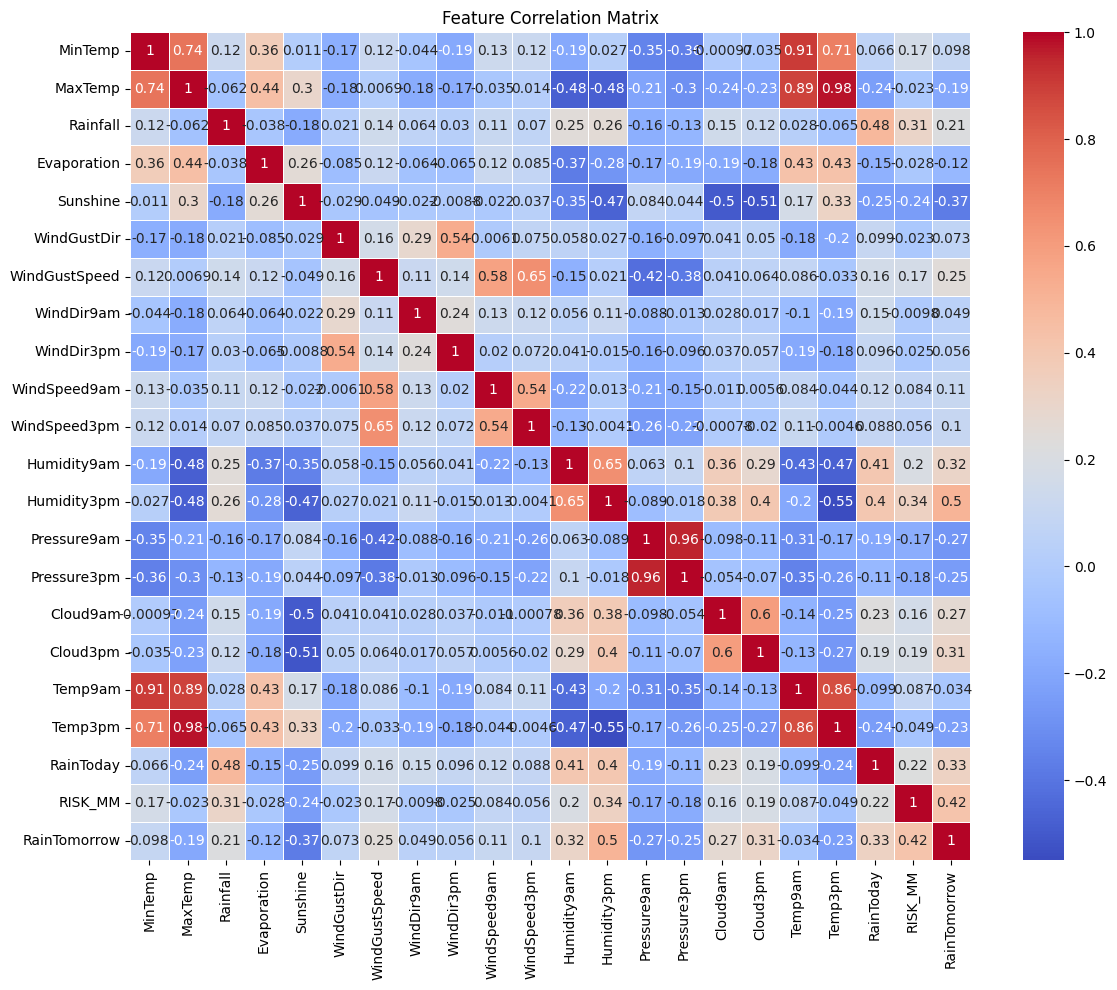

In [117]:
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()